In [224]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.fakeflares import aflare

import os
CWD = "/".join(os.getcwd().split("/")[:-2])

import pytest

from funcs.model import daylength
def great_circle_distance(a, la, b, lb):
    """a, b latitude
    la, lb longitude
    """
    la = la%(2*np.pi)
    lb = lb%(2*np.pi)
    return np.arccos(np.sin(a) * np.sin(b) + np.cos(a) * np.cos(b) * np.cos(la-lb))

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

### Plots 

In [79]:
# plot a grid

latitudes, longitudes = dot_ensemble(np.pi/2-np.pi/8,np.pi/2-np.pi/10,4,num_pts=1e6)
plt.figure(figsize=(8,8))
plt.scatter(longitudes/np.pi*180, latitudes/np.pi*180)
plt.scatter([180/2-180/10],[180/2-180/8],)
plt.xlabel("longitude [deg]")
plt.ylabel("latitude [deg]")
#plt.savefig(f"{CWD}/analysis/plots/model/dot_ensemble.png",dpi=300)

NameError: name 'dot_ensemble' is not defined

In [229]:
def xyz(theta, phi):
    return np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)
# 10% percent area spot on the stellar surface
def plot_spot_on_sphere(latdeg, londeg, incdeg):

    percent = 10
    num_pts=1e4
    indices = np.arange(0, num_pts, dtype=float) + 0.5

    phi = np.arccos(1 - 2*indices/num_pts) #latitude
    theta = np.pi * (1 + 5**0.5) * indices  #longitude
    lat, lon = latdeg*np.pi/180,londeg*np.pi/180
    #a = np.where(great_circle_distance(lat,lon, (phi-np.pi/2)%(np.pi)-np.pi/2, theta%(2*np.pi))<(percent/180*np.pi))[0]
    a = np.where(great_circle_distance(lat, lon, np.pi/2 - phi%(2*np.pi), theta%(np.pi*2))<(percent/180*np.pi))[0]

    phi2 = phi[a]
    theta2 = theta[a]
    phi3 = np.full(40,np.pi/2-lat)
    #theta3 = np.linspace(0,2*np.pi,80)
    d = daylength(latdeg*np.pi/180,i=incdeg/180*np.pi)
    theta3a = np.linspace(0,d*np.pi,40)
    theta3b = np.linspace((2-d)*np.pi,2*np.pi,40)
    phi4 = np.linspace(np.pi,-np.pi,80)
    theta4 = [lon]*80# +[lon+np.pi]*40
    x, y, z = xyz(theta, phi)
    x2, y2, z2 = xyz(theta2, phi2)
    x3a, y3a, z3a = xyz(theta3a, phi3)
    x3b, y3b, z3b = xyz(theta3b, phi3)
    x4, y4, z4 = xyz(theta4, phi4)
    ax = plt.figure(figsize=(10,10)).add_subplot(111, projection='3d')

    ax.scatter(x, y, z, s=17.5,alpha=.11,c="r");
    ax.scatter(x2, y2, z2, s=45.5, c="k",alpha=.9);
    plt.plot(x3b,y3b,z3b,c="k",linewidth=5,)#linestyle="dotted")
    plt.plot(x3a,y3a,z3a,c="k",linewidth=5,)#linestyle="dotted")
    plt.plot(x4,y4,z4,c="k")
    ax.scatter([0,],[0,],[1.,],s=200,c="k",marker="x")
    #ax.view_init(55, 45);
    ax.set_axis_off()
    ax.view_init(90-incdeg, 0);
    plt.title(f"$lat=${latdeg}$^\circ$, $i=${incdeg}$^\circ$\nvisibility$={d:.2f}P$",fontsize=26)
    plt.tight_layout()

    plt.savefig(f"{CWD}/analysis/plots/ddt/spot_on_a_sphere_l{latdeg}_i{incdeg}.png",dpi=150)
    return ax

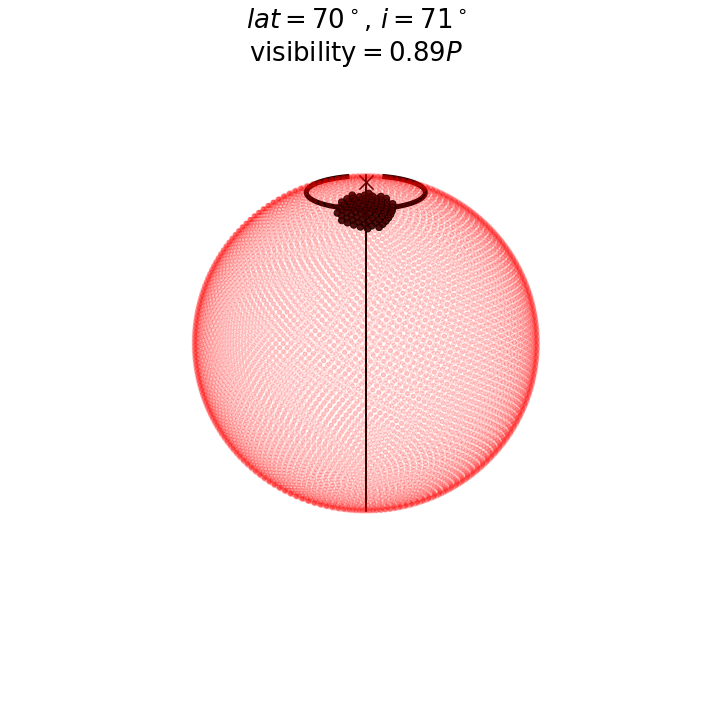

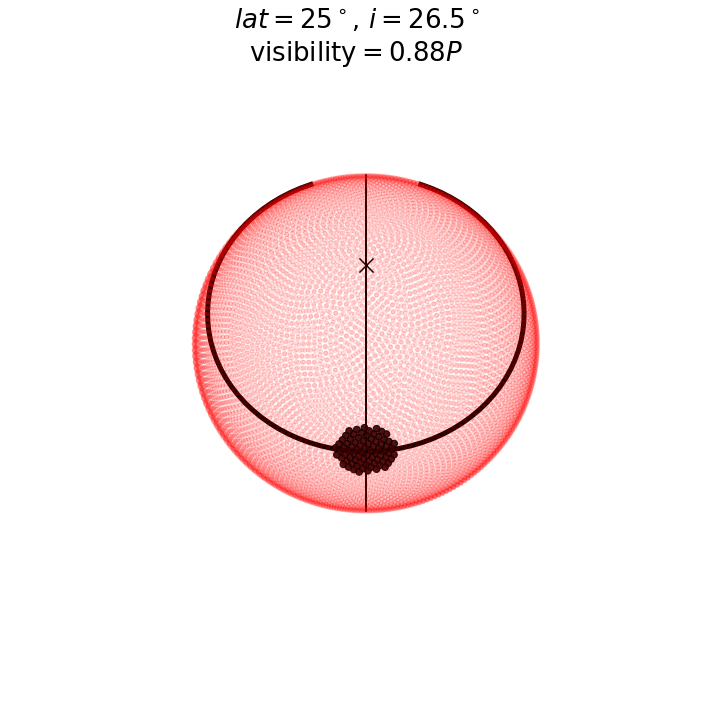

In [230]:
ax1 = plot_spot_on_sphere(70, 0, 71)
ax2 = plot_spot_on_sphere(25, 0, 26.5)
